In [ ]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from spacy.matcher import Matcher

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
df = pd.read_csv("/content/arxiv_data.csv")
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [ ]:
df = df[df["terms"].str.contains("cs", na=False)]

In [ ]:
texts = df["summaries"].dropna().tolist()[:300]
docs = [nlp(text) for text in texts]

In [ ]:
noun_phrases = []
for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text.lower())
np_freq = Counter(noun_phrases)
np_freq.most_common(10)

[('we', 795),
 ('which', 257),
 ('that', 190),
 ('it', 176),
 ('the-art', 115),
 ('this paper', 112),
 ('image segmentation', 79),
 ('our method', 71),
 ('this work', 59),
 ('-', 55)]

In [ ]:
entities = []
for doc in docs:
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
ent_df = pd.DataFrame(entities, columns=["Entity", "Label"])
ent_df["Label"].value_counts()

,count
Label,
ORG,787
CARDINAL,461
PERSON,101
ORDINAL,92
PERCENT,79
GPE,67
NORP,48
DATE,47
PRODUCT,24


In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}]
matcher.add("TECH_TERM", [pattern])
matches = []
for doc in docs:
    for match_id, start, end in matcher(doc):
        matches.append(doc[start:end].text.lower())
Counter(matches).most_common(10)

[('medical image', 133),
 ('semantic segmentation', 70),
 ('deep learning', 69),
 ('medical images', 33),
 ('experimental results', 32),
 ('extensive experiments', 30),
 ('neural networks', 26),
 ('neural network', 23),
 ('semantic image', 22),
 ('medical imaging', 20)]

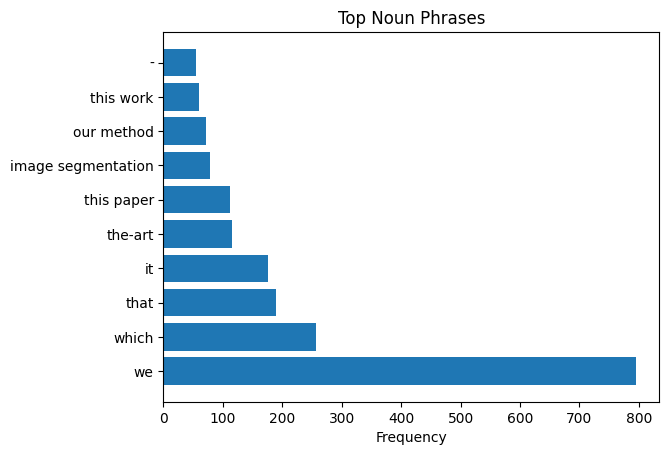

In [ ]:
top_np = dict(np_freq.most_common(10))
plt.figure()
plt.barh(list(top_np.keys()), list(top_np.values()))
plt.xlabel("Frequency")
plt.title("Top Noun Phrases")
plt.show()

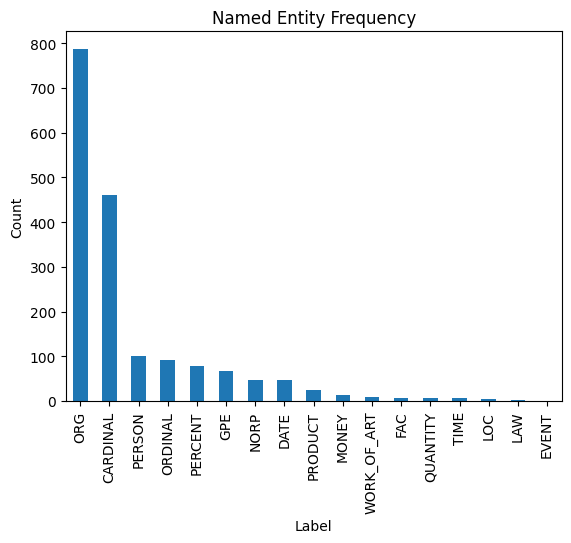

In [ ]:
ent_counts = ent_df["Label"].value_counts()
plt.figure()
ent_counts.plot(kind="bar")
plt.ylabel("Count")
plt.title("Named Entity Frequency")
plt.show()